## Observations and Insights 

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview:

In [106]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [107]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [108]:
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [109]:
merge_data.shape

(1893, 8)

In [110]:
# Checking the number of mice. 

## Value_counts() returns unique values of Mouse ID
count1 = merge_data["Mouse ID"].value_counts()
count1.shape

(249,)

In [111]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_data[['Mouse ID','Timepoint']].duplicated().sum()

5

In [112]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = merge_data.loc[merge_data[['Mouse ID','Timepoint']].duplicated(),:]
print(duplicates)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [113]:
dup2 = duplicates.iloc[1,0]
print(dup2)

g989


In [114]:
troubledmouse = merge_data[merge_data['Mouse ID'] == dup2]
troubledmouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [115]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_data[merge_data['Mouse ID'] != dup2]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [116]:
# Checking the number of mice in the clean DataFrame.

In [117]:
### Value_counts() returns unique values of Mouse ID
countcleanmice = clean_df["Mouse ID"].value_counts()
countcleanmice.shape

(248,)

## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
RegimenTumor_df = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(['mean','median',np.var,np.std,'sem'])
RegimenTumor_df.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [120]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
MiceTimepointDrug = clean_df.groupby("Drug Regimen")['Timepoint'].count()
MiceTimepointDrug.head(10)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

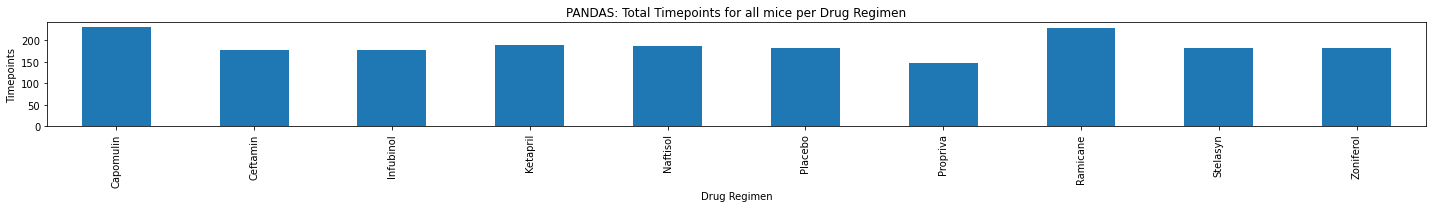

In [121]:
MiceTimepointDrug.plot(kind = 'bar', figsize = (20,3))
plt.title('PANDAS: Total Timepoints for all mice per Drug Regimen')
plt.ylabel('Timepoints')
plt.tight_layout()
plt.show()

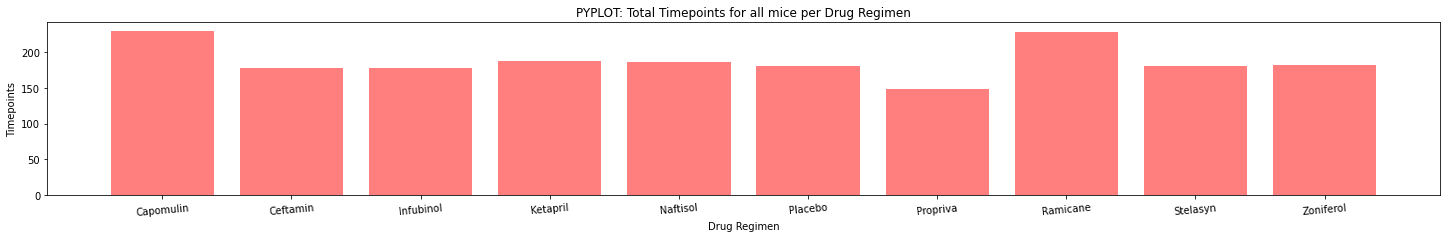

In [122]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = np.arange(len(MiceTimepointDrug))
y = clean_df.groupby("Drug Regimen")['Timepoint'].count()
tick_locations = [value for value in x]
plt.figure(figsize=(20,3))
plt.xticks(tick_locations,['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'], rotation=5)
plt.bar(x,y,color='r', alpha=0.5, align="center")
plt.tight_layout()
plt.title('PYPLOT: Total Timepoints for all mice per Drug Regimen')
plt.ylabel('Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

In [123]:
pie = mouse_metadata.groupby('Sex').count()
del pie['Drug Regimen']
del pie['Age_months']
del pie['Weight (g)']
pie.rename(columns = {'Mouse ID' : 'Mouse Gender'}, inplace = True)
pie

,Mouse Gender
Sex,
Female,124
Male,125


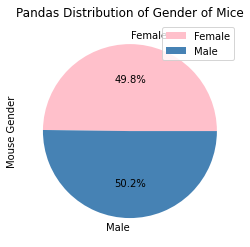

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie.plot(kind='pie', y='Mouse Gender', autopct='%1.1f%%',
                                colors = ['pink', 'steelblue'],
                                title='Pandas Distribution of Gender of Mice')
plt.show()

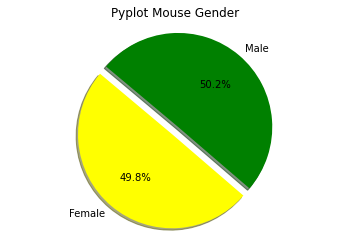

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pies = ["Female", "Male"]
pie_count = pie['Mouse Gender']
colors = ["yellow","green"]
explode = (0.1,0)
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_count, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle and print to screen
plt.axis("equal")
plt.title('Pyplot Mouse Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [126]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [129]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
CapomulinV = []
RamicaneV = []
InfubinolV = []
CeftaminV = []

for treatment in treatments:
    if treatment == 'Capomulin':
        cap = (lasttime.loc[lasttime['Drug Regimen']==treatment,'Tumor Volume (mm3)'])
        capmean = cap.mean()
        capsort = sorted(cap)
        CapomulinV.append(capsort)  
    elif treatment == 'Ramicane':   
        ram = (lasttime.loc[lasttime['Drug Regimen']==treatment,'Tumor Volume (mm3)'])
        rammean = ram.mean()
        RamicaneV.append(ram)
    elif treatment == 'Infubinol':   
        inf = (lasttime.loc[lasttime['Drug Regimen']==treatment,'Tumor Volume (mm3)'])
        infmean = inf.mean()
        InfubinolV.append(inf)
    elif treatment == 'Ceftamin':   
        cef = (lasttime.loc[lasttime['Drug Regimen']==treatment,'Tumor Volume (mm3)'])
        cefmean = cef.mean()
        CeftaminV.append(cef)

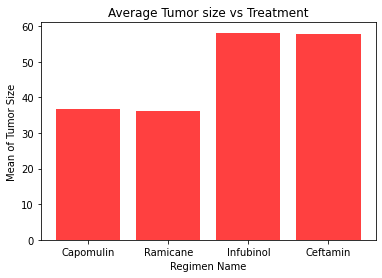

In [148]:
#treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']
meantumor = [capmean, rammean, infmean, cefmean]
plt.title("Average Tumor size vs Treatment")
plt.xlabel("Regimen Name")
plt.ylabel("Mean of Tumor Size")

plt.bar(treatments, meantumor, facecolor="red", alpha=0.75, align="center")

plt.show()

In [131]:
x_cap = np.arange(0, len(cap))
x_ram = np.arange(0, len(ram))
x_inf = np.arange(0, len(inf))
x_cef = np.arange(0, len(cef))

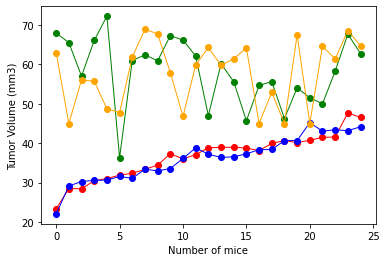

In [132]:
#x = np.arange(len(CapomulinV))
plt.plot(x_cap, cap, marker="o", color="red", linewidth=1)
plt.plot(x_ram, ram, marker="o", color="blue", linewidth=1)
plt.plot(x_inf, inf, marker="o", color="green", linewidth=1)
plt.plot(x_cef, cef, marker="o", color="orange", linewidth=1)
#plt.title("Treatments")
plt.xlabel("Number of mice")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [133]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q = lasttime['Tumor Volume (mm3)']
quartiles = q.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 45.8758668475
The upper quartile of tumor volume is: 65.05362410500001
The interquartile range of tumor volume is: 19.177757257500012
The the median of tumor volume is: 55.793278175 
Values below 17.10923096124998 could be outliers.
Values above 93.82025999125003 could be outliers.


In [134]:
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
Capomulin = lasttime.loc[(lasttime['Drug Regimen']=='Capomulin'),:]
Ramicane = lasttime.loc[(lasttime['Drug Regimen']=='Ramicane'),:]
Infubinol = lasttime.loc[(lasttime['Drug Regimen']=='Infubinol'),:]
Ceftamin = lasttime.loc[(lasttime['Drug Regimen']=='Ceftamin'),:]

In [135]:
# Determine outliers using upper and lower bounds
xc = Capomulin['Tumor Volume (mm3)']
xr = Ramicane['Tumor Volume (mm3)']
xi = Infubinol['Tumor Volume (mm3)']
xce = Ceftamin['Tumor Volume (mm3)']
outlier = []
for x in xc:
    if x <= lower_bound:
        outlier.append(x) 
    elif x >= upper_bound:  
        outlier.append(x) 
for x in xr:
    if x <= lower_bound:
        outlier.append(x) 
    elif x >= upper_bound:  
        outlier.append(x) 
for x in xi:
    if x <= lower_bound:
        outlier.append(x) 
    elif x >= upper_bound:  
        outlier.append(x) 
for x in xce:
    if x <= lower_bound:
        outlier.append(x) 
    elif x >= upper_bound:  
        outlier.append(x) 
outlier

[]

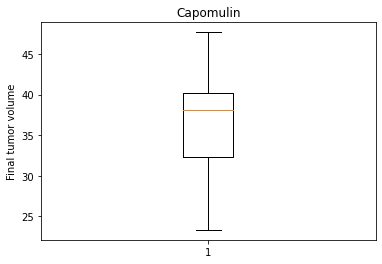

In [136]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('Final tumor volume')
ax1.boxplot(xc)
plt.show()

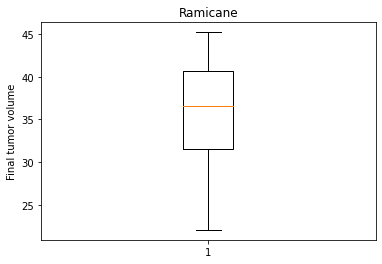

In [137]:
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane')
ax1.set_ylabel('Final tumor volume')
ax1.boxplot(xr)
plt.show()

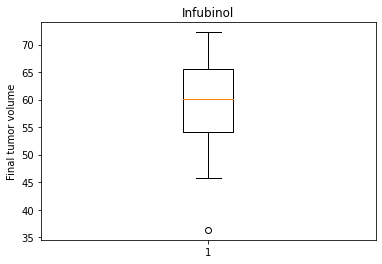

In [138]:
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol')
ax1.set_ylabel('Final tumor volume')
ax1.boxplot(xi)
plt.show()

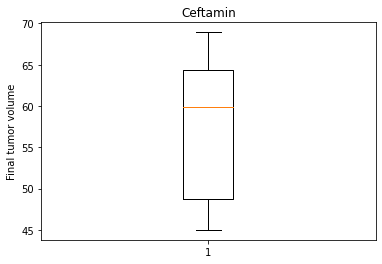

In [139]:
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin')
ax1.set_ylabel('Final tumor volume')
ax1.boxplot(xce)
plt.show()

## Line and Scatter Plots

In [140]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [141]:
xv = Capomulin['Tumor Volume (mm3)']
xt = Capomulin['Timepoint']

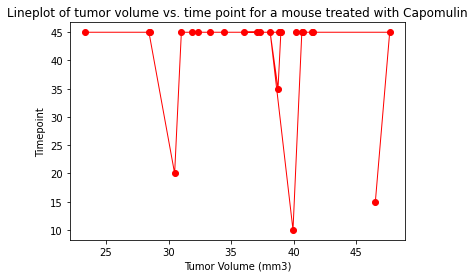

In [142]:
plt.plot(xv, xt, marker="o", color="red", linewidth=1)
plt.title('Lineplot of tumor volume vs. time point for a mouse treated with Capomulin')
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.show()


In [143]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
xv = Capomulin['Tumor Volume (mm3)']
xw = Capomulin['Weight (g)']

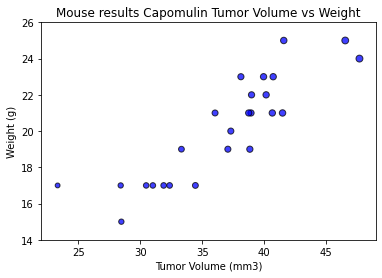

In [144]:
plt.scatter(xv, xw, marker="o", facecolors="blue", edgecolors="black", s=xv, alpha=0.75)
plt.ylim(14, 26)
plt.xlim(22, 49)
plt.title("Mouse results Capomulin Tumor Volume vs Weight")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

## Correlation and Regression

In [145]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regime

In [146]:
correlation = st.pearsonr(xv,xw)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.88


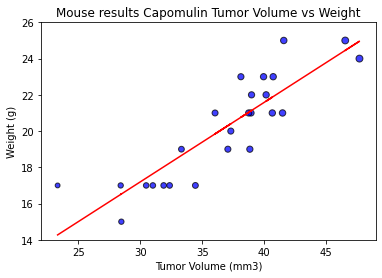

In [147]:
plt.scatter(xv, xw, marker="o", facecolors="blue", edgecolors="black", s=xv, alpha=0.75)
plt.ylim(14, 26)
plt.xlim(22, 49)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xv, xw)
regress_values = xv * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(xv,regress_values,"r-")
plt.title("Mouse results Capomulin Tumor Volume vs Weight")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()